The Sentinel-2 satellite carries a multispectral instrument with 13 spectral bands. 
Here are the typical bands used for NDVI, NDWI, and NDBI calculations with their respective formulas:

1. **NDVI (Normalized Difference Vegetation Index):**
   - Sentinel-2 bands: NIR (B8) and Red (B4)
   - Formula:
   \[ \text{NDVI} = \frac{(B8 - B4)}{(B8 + B4)} \]

2. **NDWI (Normalized Difference Water Index):**
   - Sentinel-2 bands: Green (B3) and NIR (B8)
   - Formula:
   \[ \text{NDWI} = \frac{(B3 - B8)}{(B3 + B8)} \]

3. **NDBI (Normalized Difference Built-Up Index):**
   - Sentinel-2 bands: SWIR (B11) and NIR (B8)
   - Formula:
   \[ \text{NDBI} = \frac{(B11 - B8)}{(B11 + B8)} \]

In these formulas, 

B4 represents the red band, 
B3 represents the green band, 
B8 represents the near-infrared band,
and B11 represents the shortwave infrared band. 
These Sentinel-2 bands are commonly used for various remote sensing and GIS applications, 
including vegetation analysis, water detection, and urban land cover classification.

In [56]:
#import essential libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt 
import rasterio as rio
from rasterio.plot import show
%matplotlib inline

In [58]:
#open all bands images 

In [59]:
red = rio.open("F:\\Project\\Image_Data\\Red(B4).jp2")
green = rio.open("F:\\Project\\Image_Data\\Green(B3).jp2")
nir = rio.open("F:\\Project\\Image_Data\\NIR(B8).jp2")
swir = rio.open("F:\\Project\\Image_Data\\SWIR(B11).jp2")

In [60]:
#visulize all the images using matplotlib or rasterio

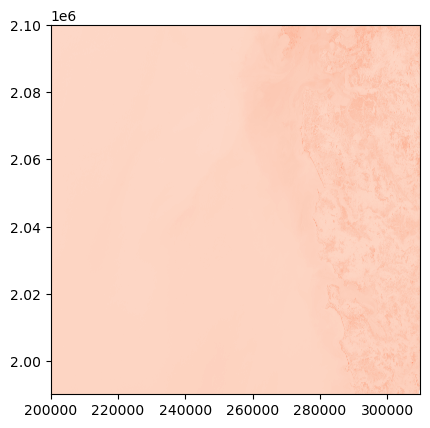

<Axes: >

In [61]:
show(red, cmap='Reds')

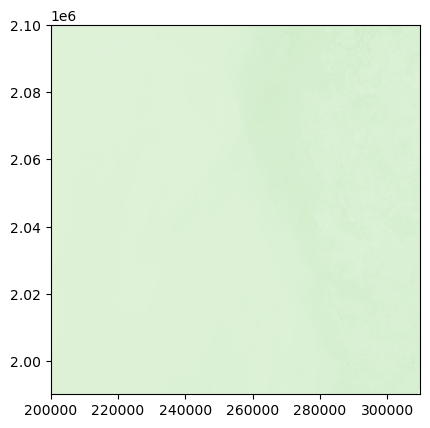

<Axes: >

In [62]:
show(green, cmap='Greens')

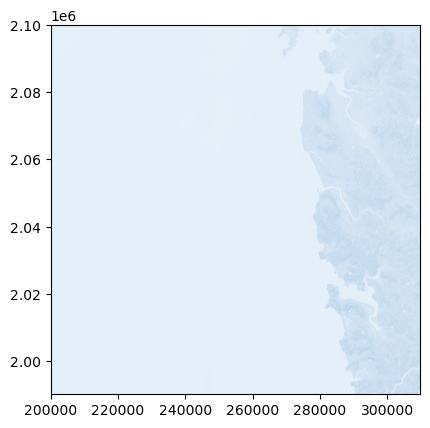

<Axes: >

In [63]:
show(nir, cmap='Blues')

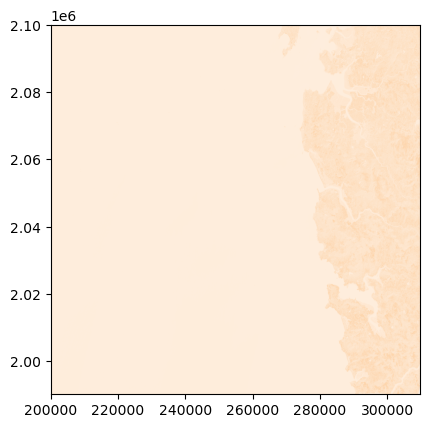

<Axes: >

In [64]:
show(swir, cmap='Oranges')

In [65]:
#read all images in array 

In [66]:
red.read()
green.read()
nir.read()
swir.read()

array([[[1074, 1081, 1079, ..., 2798, 3039, 2977],
        [1073, 1081, 1078, ..., 2775, 2959, 3019],
        [1082, 1077, 1083, ..., 2789, 2939, 2962],
        ...,
        [1140, 1148, 1143, ...,    0,    0,    0],
        [1156, 1156, 1147, ...,    0,    0,    0],
        [1144, 1149, 1144, ...,    0,    0,    0]]], dtype=uint16)

In [67]:
# convert this to float32 

In [68]:
red = red.read().astype('float32')
green = green.read().astype('float32')
nir = nir.read().astype('float32')
swir = swir.read().astype('float32')

In [69]:
# calculate ndvi, ndwi, ndbi

In [70]:
ndvi = (nir-red)/(nir+red)

C:\Users\yashjadhav\AppData\Local\Temp\ipykernel_12080\1342287713.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir-red)/(nir+red)


In [71]:
ndwi = (green-nir)/(green+nir)

C:\Users\yashjadhav\AppData\Local\Temp\ipykernel_12080\91251.py:1: RuntimeWarning: invalid value encountered in divide
  ndwi = (green-nir)/(green+nir)


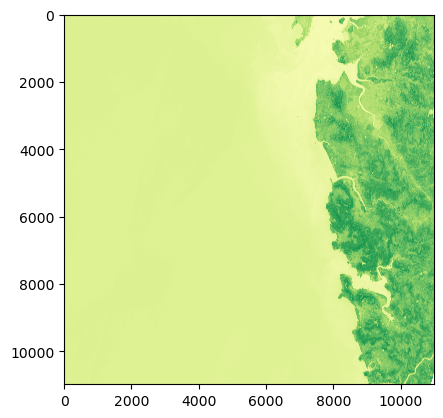

<Axes: >

In [72]:
#plotting from rasterio
show(ndvi, cmap='RdYlGn')

In [89]:
ndvi.dtype

dtype('float32')

you can also plot this with matplotlib

note it only plot 2D images if you have 2d then only go for matplotib otherwise rasterio is better option

in our case we have 3D image , so we cannot plot this image using matplolib

Below is code given to plot image using plt

plt.imshow(ndvi, cmap="RdYlGn")

plt.colorbar()

plt.show()

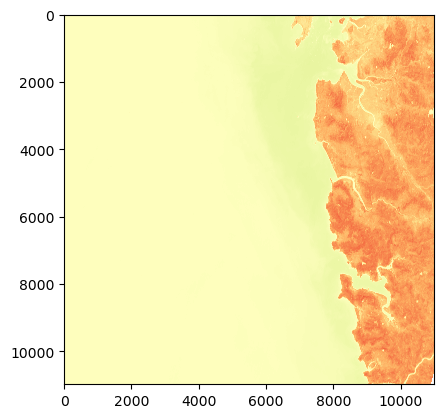

<Axes: >

In [73]:
show(ndwi, cmap='RdYlGn')

In [74]:
swir.shape

(1, 5490, 5490)

In [75]:
nir.shape

(1, 10980, 10980)

In [78]:
nir = nir[:, 0:5490:, 0:5490]

In [79]:
nir.shape

(1, 5490, 5490)

To Calculate NDBI it is essential to have same shape image in my case i have nir and swir in differnt shape 
for that i reshape nir same as swir 
if you have same shape for all bands image then you don't need to reshape it 

In [86]:
ndbi = (swir-nir)/(swir+nir)

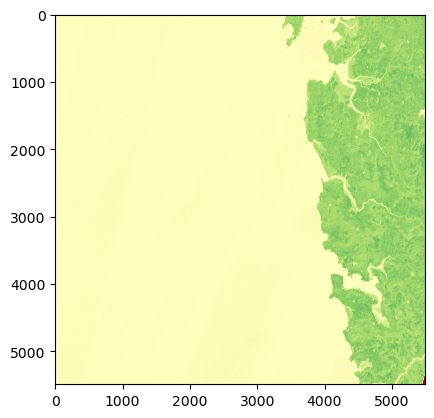

<Axes: >

In [82]:
show(ndbi, cmap='RdYlGn')

# Supproted colors in Rasterio

You can try differnt coors for better Visulization

 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'


# For Landsat Sateliite Images

find which is red, green, nir, swir 
according to band follow above steps as smiliar 